### Step 1(data availablity)

    import the packages
    import the data sets

In [660]:
# regular packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# hypothesis testing
import scipy.stats as stats

# stats modals
import statsmodels.formula.api as smf

# import sklearn i.e scientific kit for stats and ml models it also includes the smf parts
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

## import the linear regression modal
from sklearn.linear_model import LinearRegression

## import the train/ test split for training or testing data
from sklearn.model_selection import train_test_split

#### Data availablity


In [662]:
cars_sales = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Python1\Class 17\Car_sales - 1715413211292.csv")
cars_sales.head()

Manufacturer    Model  Sales_in_thousands  four_year_resale_value  \
0        Acura  Integra              16.919                  16.360   
1        Acura       TL              39.384                  19.875   
2        Acura       CL              14.114                  18.225   
3        Acura       RL               8.588                  29.725   
4         Audi       A4              20.397                  22.255   

  Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  \
0    Passenger               21.50          1.8       140.0      101.2   67.3   
1    Passenger               28.40          3.2       225.0      108.1   70.3   
2    Passenger                 NaN          3.2       225.0      106.9   70.6   
3    Passenger               42.00          3.5       210.0      114.6   71.4   
4    Passenger               23.99          1.8       150.0      102.6   68.2   

   Length  Curb_weight  Fuel_capacity  Fuel_efficiency Latest_Launch  \
0   172.4        2.639           13.2             28.0      2/2/2012   
1   192.9        3.517           17.2             25.0      6/3/2011   
2   192.0        3.470           17.2             26.0      1/4/2012   
3   196.6        3.850           18.0             22.0     3/10/2011   
4   178.0        2.998           16.4             27.0     10/8/2011   

   Power_perf_factor  
0          58.280150  
1          91.370778  
2                NaN  
3          91.389779  
4          62.777639

### 2. Understanding the buisness problem

    predict the sales of the y variable and to choose the vars which are imp (Continous var) hence, Linear Regression

### 3. EDA

In [665]:
cars_sales.info() # to find the missings/outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Manufacturer            157 non-null    object 
 1   Model                   157 non-null    object 
 2   Sales_in_thousands      157 non-null    float64
 3   four_year_resale_value  121 non-null    float64
 4   Vehicle_type            157 non-null    object 
 5   Price_in_thousands      155 non-null    float64
 6   Engine_size             156 non-null    float64
 7   Horsepower              156 non-null    float64
 8   Wheelbase               156 non-null    float64
 9   Width                   156 non-null    float64
 10  Length                  156 non-null    float64
 11  Curb_weight             155 non-null    float64
 12  Fuel_capacity           156 non-null    float64
 13  Fuel_efficiency         154 non-null    float64
 14  Latest_Launch           157 non-null    ob

#### Dividing the data intoo categorial & continlous seperately

In [667]:
# Method 1: dividing the data but also creating the copy of the sub-data:
# This method is used when the dataste is small.

continous = cars_sales.select_dtypes('float64')
categorical = cars_sales.select_dtypes('object')

In [668]:
# Method 2: Fetching the column names of the continuous & categorical data.
# This method will fetch only the column names but not the actual data.

conti = cars_sales.select_dtypes('float64').columns
categ = cars_sales.select_dtypes('object').columns

In [669]:
conti

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'],
      dtype='object')

In [670]:
categ

Index(['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch'], dtype='object')

### 4. Data prep

    Create the UDF to detect the missings and the outliers

In [672]:
# func defintion
def continous_var_summ(x): # x works upon the cols 

    # missings
    total_rows = x.shape[0] # it will return the no of rows
    missings = x.isna().sum() # to count the missing data
    percentage_missings = missings * 100 / total_rows # no of missings / total num of rows * 100

    # outliers(iqr)
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower_cutoff = q1 - 1.5 * iqr
    upper_cutoff = q3 + 1.5 * iqr

    return pd.Series([x.dtype , x.nunique() , total_rows , x.count() , missings , percentage_missings,x.sum(),
                     x.mean() , x.std(), x.var(), lower_cutoff, upper_cutoff,
                     x.min(), x.quantile(0.01), x.quantile(0.05) , x.quantile(0.10), x.quantile(0.25) , x.quantile(0.5),x.quantile(0.75),
                     x.quantile(0.90), x.quantile(0.95), x.quantile(0.99) , x.max()],
                    
                    
                    index = ['dtype' , 'Cardinality' , 'Total Rows', 'Count', 'Missing data', '% of missing data',
                            'sum' , 'mean', 'std' , 'var' , 'lower_cutoff' , 'upper_cutoff' , 
                            'min' , 'p1', 'p5', 'p10', 'p25', 'p50' , 'p75' , 'p90', 'p95' , 'p99' , 'max'])


In [673]:
# func calling

summ1 = continous.apply( continous_var_summ)
summ1

Sales_in_thousands four_year_resale_value  \
dtype                        float64                float64   
Cardinality                      157                    117   
Total Rows                       157                    157   
Count                            157                    121   
Missing data                       0                     36   
% of missing data                0.0              22.929936   
sum                         8320.698                2186.83   
mean                       52.998076              18.072975   
std                        68.029422              11.453384   
var                      4628.002257             131.180007   
lower_cutoff                 -66.649                -1.6625   
upper_cutoff                 148.719                32.7975   
min                             0.11                   5.16   
p1                           0.93728                  6.173   
p5                            1.8708                   7.85   
p10                           5.4536                  9.125   
p25                           14.114                  11.26   
p50                            29.45                  14.18   
p75                           67.956                 19.875   
p90                         127.6416                 32.075   
p95                         185.3362                  41.25   
p99                        260.64532                  60.22   
max                          540.561                  67.55   

                  Price_in_thousands Engine_size   Horsepower   Wheelbase  \
dtype                        float64     float64      float64     float64   
Cardinality                      152          31           66          88   
Total Rows                       157         157          157         157   
Count                            155         156          156         156   
Missing data                       2           1            1           1   
% of missing data           1.273885    0.636943     0.636943    0.636943   
sum                         4245.567       477.5      29008.0     16768.0   
mean                       27.390755    3.060897   185.948718  107.487179   
std                        14.351653    1.044653    56.700321    7.641303   
var                       205.969949      1.0913  3214.926385   58.389512   
lower_cutoff                 -2.8775      0.3875        51.25        89.2   
upper_cutoff                 52.8425      5.4875       313.25       126.0   
min                            9.235         1.0         55.0        92.6   
p1                          10.23144       1.555         96.4      92.875   
p5                            12.469         1.8        114.5      95.875   
p10                          13.9708        1.95        120.0       98.65   
p25                          18.0175         2.3        149.5       103.0   
p50                           22.799         3.0        177.5       107.0   
p75                          31.9475       3.575        215.0       112.2   
p90                           44.017         4.6        254.0       115.5   
p95                           55.835       4.775        300.0      119.25   
p99                          78.4798         5.7       325.75     134.375   
max                             85.5         8.0        450.0       138.7   

                       Width      Length Curb_weight Fuel_capacity  \
dtype                float64     float64     float64       float64   
Cardinality               78         127         147            55   
Total Rows               157         157         157           157   
Count                    156         156         155           156   
Missing data               1           1           2             1   
% of missing data   0.636943    0.636943    1.273885      0.636943   
sum                  11099.4     29225.6     523.594        2800.5   
mean                   71.15   187.34359    3.378026     17.951923   
std                 3.4518

#### 5. Treating the missing data & outliers

In [675]:
summ1.loc['p1']

Sales_in_thousands         0.93728
four_year_resale_value       6.173
Price_in_thousands        10.23144
Engine_size                  1.555
Horsepower                    96.4
Wheelbase                   92.875
Width                       66.085
Length                     154.915
Curb_weight                 2.2454
Fuel_capacity                 11.9
Fuel_efficiency               15.0
Power_perf_factor         38.46192
Name: p1, dtype: object

In [676]:
## outlier treatment using %ile method

continous = continous.apply( lambda x : x.clip(lower = x.quantile(0.01) , upper = x.quantile(0.99) ) )
continous

Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
0                16.919                  16.360               21.50   
1                39.384                  19.875               28.40   
2                14.114                  18.225                 NaN   
3                 8.588                  29.725               42.00   
4                20.397                  22.255               23.99   
..                  ...                     ...                 ...   
152               3.545                     NaN               24.40   
153              15.245                     NaN               27.50   
154              17.531                     NaN               28.80   
155               3.493                     NaN               45.50   
156              18.969                     NaN               36.00   

     Engine_size  Horsepower  Wheelbase  Width  Length  Curb_weight  \
0            1.8       140.0      101.2   67.3   172.4        2.639   
1            3.2       225.0      108.1   70.3   192.9        3.517   
2            3.2       225.0      106.9   70.6   192.0        3.470   
3            3.5       210.0      114.6   71.4   196.6        3.850   
4            1.8       150.0      102.6   68.2   178.0        2.998   
..           ...         ...        ...    ...     ...          ...   
152          1.9       160.0      100.5   67.6   176.6        3.042   
153          2.4       168.0      104.9   69.3   185.9        3.208   
154          2.4       168.0      104.9   69.3   186.2        3.259   
155          2.3       236.0      104.9   71.5   185.7        3.601   
156          2.9       201.0      109.9   72.1   189.8        3.600   

     Fuel_capacity  Fuel_efficiency  Power_perf_factor  
0             13.2             28.0          58.280150  
1             17.2             25.0          91.370778  
2             17.2             26.0                NaN  
3             18.0             22.0          91.389779  
4             16.4             27.0          62.777639  
..             ...              ...                ...  
152           15.8             25.0          66.498812  
153           17.9             25.0          70.654495  
154           17.9             25.0          71.155978  
155           18.5             23.0         101.623357  
156           21.1             24.0          85.735655  

[157 rows x 12 columns]

In [677]:
summ1 = continous.apply( continous_var_summ)
summ1 # outliers have been treated.

Sales_in_thousands four_year_resale_value  \
dtype                        float64                float64   
Cardinality                      155                    115   
Total Rows                       157                    157   
Count                            157                    121   
Missing data                       0                     36   
% of missing data                0.0              22.929936   
sum                        8025.5292               2180.421   
mean                        51.11802              18.020008   
std                        57.722699              11.181335   
var                      3331.909938              125.02226   
lower_cutoff                 -66.649                -1.6625   
upper_cutoff                 148.719                32.7975   
min                          0.93728                  6.173   
p1                          0.946643                 6.4234   
p5                            1.8708                   7.85   
p10                           5.4536                  9.125   
p25                           14.114                  11.26   
p50                            29.45                  14.18   
p75                           67.956                 19.875   
p90                         127.6416                 32.075   
p95                         185.3362                  41.25   
p99                       253.560581                 59.896   
max                        260.64532                  60.22   

                  Price_in_thousands Engine_size   Horsepower   Wheelbase  \
dtype                        float64     float64      float64     float64   
Cardinality                      150          29           64          87   
Total Rows                       157         157          157         157   
Count                            155         156          156         156   
Missing data                       2           1            1           1   
% of missing data           1.273885    0.636943     0.636943    0.636943   
sum                       4235.95548      475.81      28910.3     16760.1   
mean                       27.328745    3.050064   185.322436  107.436538   
std                         14.06397    0.982279     52.81647    7.424295   
var                       197.795238    0.964871  2789.579526   55.120156   
lower_cutoff                 -2.8775      0.3875        51.25        89.2   
upper_cutoff                 52.8425      5.4875       313.25       126.0   
min                         10.23144       1.555         96.4      92.875   
p1                         10.476362     1.57975        98.38    92.99875   
p5                            12.469         1.8        114.5      95.875   
p10                          13.9708        1.95        120.0       98.65   
p25                          18.0175         2.3        149.5       103.0   
p50                           22.799         3.0        177.5       107.0   
p75                          31.9475       3.575        215.0       112.2   
p90                           44.017         4.6        254.0       115.5   
p95                           55.835       4.775        300.0      119.25   
p99                        76.584508         5.7     317.0875   132.51875   
max                          78.4798         5.7       325.75     134.375   

                       Width      Length Curb_weight Fuel_capacity  \
dtype                float64     float64     float64       float64   
Cardinality               76         125         145            54   
Total Rows               157         157         157           157   
Count                    156         156         155           156   
Missing data               1           1           2             1   
% of missing data   0.636943    0.636943    1.273885      0.636943   
sum                 11102.45    29223.94   523.77016        2799.9   
mean               71.169551  187.332949    3.379162     17.948077   
std                 3.3903

* **Note:- the working ranges of p99 & p1 has become the max and min points repectively**

In [679]:
## treating the missings using .fillna()


continous = continous.apply( lambda x : x.fillna( x.mean() ) )
continous

Sales_in_thousands  four_year_resale_value  Price_in_thousands  \
0                16.919               16.360000           21.500000   
1                39.384               19.875000           28.400000   
2                14.114               18.225000           27.328745   
3                 8.588               29.725000           42.000000   
4                20.397               22.255000           23.990000   
..                  ...                     ...                 ...   
152               3.545               18.020008           24.400000   
153              15.245               18.020008           27.500000   
154              17.531               18.020008           28.800000   
155               3.493               18.020008           45.500000   
156              18.969               18.020008           36.000000   

     Engine_size  Horsepower  Wheelbase  Width  Length  Curb_weight  \
0            1.8       140.0      101.2   67.3   172.4        2.639   
1            3.2       225.0      108.1   70.3   192.9        3.517   
2            3.2       225.0      106.9   70.6   192.0        3.470   
3            3.5       210.0      114.6   71.4   196.6        3.850   
4            1.8       150.0      102.6   68.2   178.0        2.998   
..           ...         ...        ...    ...     ...          ...   
152          1.9       160.0      100.5   67.6   176.6        3.042   
153          2.4       168.0      104.9   69.3   185.9        3.208   
154          2.4       168.0      104.9   69.3   186.2        3.259   
155          2.3       236.0      104.9   71.5   185.7        3.601   
156          2.9       201.0      109.9   72.1   189.8        3.600   

     Fuel_capacity  Fuel_efficiency  Power_perf_factor  
0             13.2             28.0          58.280150  
1             17.2             25.0          91.370778  
2             17.2             26.0          76.849583  
3             18.0             22.0          91.389779  
4             16.4             27.0          62.777639  
..             ...              ...                ...  
152           15.8             25.0          66.498812  
153           17.9             25.0          70.654495  
154           17.9             25.0          71.155978  
155           18.5             23.0         101.623357  
156           21.1             24.0          85.735655  

[157 rows x 12 columns]

In [680]:
summ1 = continous.apply( continous_var_summ )
summ1

Sales_in_thousands four_year_resale_value  \
dtype                        float64                float64   
Cardinality                      155                    116   
Total Rows                       157                    157   
Count                            157                    157   
Missing data                       0                      0   
% of missing data                0.0                    0.0   
sum                        8025.5292            2829.141298   
mean                        51.11802              18.020008   
std                        57.722699                9.80668   
var                      3331.909938              96.170969   
lower_cutoff                 -66.649                 4.1525   
upper_cutoff                 148.719                26.5325   
min                          0.93728                  6.173   
p1                          0.946643                6.87412   
p5                            1.8708                  8.425   
p10                           5.4536                   9.71   
p25                           14.114                 12.545   
p50                            29.45                  17.71   
p75                           67.956                  18.14   
p90                         127.6416                 27.025   
p95                         185.3362                 39.275   
p99                       253.560581                59.3128   
max                        260.64532                  60.22   

                  Price_in_thousands Engine_size    Horsepower     Wheelbase  \
dtype                        float64     float64       float64       float64   
Cardinality                      151          30            65            88   
Total Rows                       157         157           157           157   
Count                            157         157           157           157   
Missing data                       0           0             0             0   
% of missing data                0.0         0.0           0.0           0.0   
sum                       4290.61297  478.860064  29095.622436  16867.536538   
mean                       27.328745    3.050064    185.322436    107.436538   
std                        13.973525    0.979125     52.646914      7.400461   
var                       195.259402    0.958686   2771.697606     54.766822   
lower_cutoff                 -2.5325         0.5          52.5          89.2   
upper_cutoff                 52.6075         5.3         312.5         126.0   
min                         10.23144       1.555          96.4        92.875   
p1                         10.485434      1.5802        98.416        93.001   
p5                            12.491         1.8         114.6         95.92   
p10                          13.9762        1.96         120.0          98.7   
p25                           18.145         2.3         150.0         103.0   
p50                             23.4         3.0         180.0         107.0   
p75                            31.93         3.5         215.0         112.2   
p90                           43.788         4.6         253.8        115.46   
p95                           55.225        4.76         300.0         119.2   
p99                        76.514312         5.7        316.93       132.485   
max                          78.4798         5.7        325.75       134.375   

                          Width        Length Curb_weight Fuel_capacity  \
dtype                   float64       float64     float64       float64   
Cardinality                  77           126         146            55   
Total Rows                  157           157         157           157   
Count                       157           157         157           157   
Missing data                  0             0           0             0   
% of missing data           0.0           0.0         0.0           0.0   
sum                11173.619551  29411.272949  530.528485  

* **the missing data have been treated hence the missings & % missings is 0**

#### Linear Regression model is based upon many assumptions but the 4 assumptions are as follows:-

    1. the x & y variable must follow the normal distribution, if not both then the y variable should follow the normal distribution.

    2. the x variable must be linear to the y variable i.e it must follow the formula y ~ x1 + x2 + x3 + x4

    3. the num of records (rows) > num of variables (cols)

    4. x must be an independent variable.

#### Distribution of the Y variable

    y var is the variable to be predicted hence, we need to check it's distribution 

    the distribution can be checked through hist()

    .skew() is the direct func to get the num of skewness i.e +ive skew or -ive skew

C:\Users\Hp\AppData\Local\Temp\ipykernel_32716\1412963984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( continous.Sales_in_thousands )


<Axes: xlabel='Sales_in_thousands', ylabel='Density'>

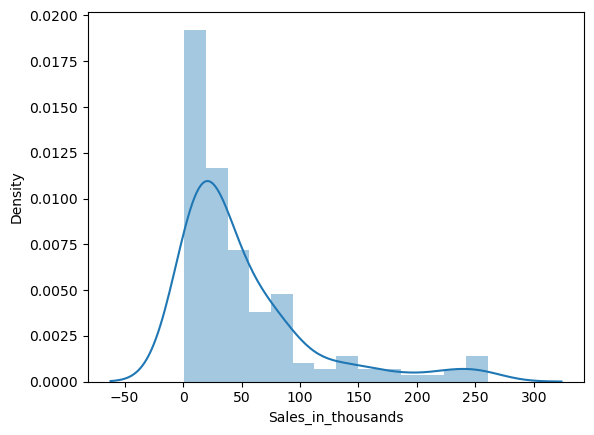

In [684]:
sns.distplot( continous.Sales_in_thousands )

* **Positively skewed curve the majority of the values lies b/w +ive areas**

In [686]:
continous.Sales_in_thousands.skew()

1.9924932920508793

* **for normal distributionn the skew value must be 0**
* **so we have to use the log func to make it closer to the zero**

In [688]:
log_sales_in_thousands = np.log( continous.Sales_in_thousands )
log_sales_in_thousands

0      2.828437
1      3.673360
2      2.647167
3      2.150366
4      3.015388
         ...   
152    1.265538
153    2.724252
154    2.863971
155    1.250761
156    2.942806
Name: Sales_in_thousands, Length: 157, dtype: float64

In [689]:
log_sales_in_thousands.skew()

-0.5925861100519006

* **this value is closer to 0 hence, normally distributed**

### Handling the Categorigal Data

    the cat data can be handles through dummy variables i.e to convert the cat data into 0 and 1 to populate it into the formula y=mx+c.

In [692]:
## find the cardinality.
# we need to find the cardinality coz to make use of the vars which have the less cardinality.

categorical.nunique()

Manufacturer      30
Model            156
Vehicle_type       2
Latest_Launch    130
dtype: int64

* **Note:- manufaturer has 30 unique rows hence 30 dummy vars.**
* **the calculation is tot_col = 16 + dummy var = 30 , 16+30 = 46**
* **we can't take model as dummy var coz:**
* **tot_col = 16 + dummy = 157**
* **16+157 = 173 (tot_rows = 157) 157 < 173 hence, it violtes the assumption**
* **we will select manufaturer and vehicle type as it has less cardinality**

#### Dummy Variables:-

    pd.getdummies()

In [695]:
categorical = pd.get_dummies( categorical.loc[:: , ['Manufacturer' , 'Vehicle_type' ] ] , dtype= 'uint8' , drop_first = True)
categorical

Manufacturer_Audi  Manufacturer_BMW  Manufacturer_Buick  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    1                 0                   0   
..                 ...               ...                 ...   
152                  0                 0                   0   
153                  0                 0                   0   
154                  0                 0                   0   
155                  0                 0                   0   
156                  0                 0                   0   

     Manufacturer_Cadillac  Manufacturer_Chevrolet  Manufacturer_Chrysler  \
0                        0                       0                      0   
1                        0                       0                      0   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       0                      0   
..                     ...                     ...                    ...   
152                      0                       0                      0   
153                      0                       0                      0   
154                      0                       0                      0   
155                      0                       0                      0   
156                      0                       0                      0   

     Manufacturer_Dodge  Manufacturer_Ford  Manufacturer_Honda  \
0                     0                  0                   0   
1                     0                  0                   0   
2                     0                  0                   0   
3                     0                  0                   0   
4                     0                  0                   0   
..                  ...                ...                 ...   
152                   0                  0                   0   
153                   0                  0                   0   
154                   0                  0                   0   
155                   0                  0                   0   
156                   0                  0                   0   

     Manufacturer_Hyundai  ...  Manufacturer_Plymouth  Manufacturer_Pontiac  \
0                       0  ...                      0                     0   
1                       0  ...                      0                     0   
2                       0  ...                      0                     0   
3                       0  ...                      0                     0   
4                       0  ...                      0                     0   
..                    ...  ...                    ...                   ...   
152                     0  ...                      0                     0   
153                     0  ...                      0                     0   
154                     0  ...                      0                     0   
155                     0  ...                      0                     0   
156                     0  ...                      0                     0   

     Manufacturer_Porsche  Manufacturer_Saab  Manufacturer_Saturn  \
0                       0                  0                    0   
1                       0                  0                    0   
2                       0                  0                    0   
3                       0                  0                    0   
4                       0                  0                    0   
..                    ...                ...                  ...   
152                     0                  0                    0   
153              

* **Note:-**
* tot_num of cols = 16
* dummy varrs = 30+2 = 32
* hence 32 cols
* drop_first parameter is used to take care of the multi colinearity i.e the depnedcy of the x vars among themselves
* it reduces 2 cols, i.e 32 - 2 = 30

In [697]:
categorical.columns # violation of the iNC rules Manufacturer_Mercedes-B , this will give error in our data model.

Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger'],
      dtype='object')

In [698]:
# Renaming the cols to take care of the INC Rules:-

categorical = categorical.rename( columns = {'Manufacturer_Mercedes-B' : 'Manufacturer_Mercedes_B'} )

In [699]:
categorical.columns

Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger'],
      dtype='object')

### 5. Data Combining

    pd.concat will works
    pd.concat(axis = 1)

    joining is not possible as there is no common col

In [701]:
cars_new = pd.concat([categorical , continous ], axis = 1)
cars_new

Manufacturer_Audi  Manufacturer_BMW  Manufacturer_Buick  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    1                 0                   0   
..                 ...               ...                 ...   
152                  0                 0                   0   
153                  0                 0                   0   
154                  0                 0                   0   
155                  0                 0                   0   
156                  0                 0                   0   

     Manufacturer_Cadillac  Manufacturer_Chevrolet  Manufacturer_Chrysler  \
0                        0                       0                      0   
1                        0                       0                      0   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       0                      0   
..                     ...                     ...                    ...   
152                      0                       0                      0   
153                      0                       0                      0   
154                      0                       0                      0   
155                      0                       0                      0   
156                      0                       0                      0   

     Manufacturer_Dodge  Manufacturer_Ford  Manufacturer_Honda  \
0                     0                  0                   0   
1                     0                  0                   0   
2                     0                  0                   0   
3                     0                  0                   0   
4                     0                  0                   0   
..                  ...                ...                 ...   
152                   0                  0                   0   
153                   0                  0                   0   
154                   0                  0                   0   
155                   0                  0                   0   
156                   0                  0                   0   

     Manufacturer_Hyundai  ...  Price_in_thousands  Engine_size  Horsepower  \
0                       0  ...           21.500000          1.8       140.0   
1                       0  ...           28.400000          3.2       225.0   
2                       0  ...           27.328745          3.2       225.0   
3                       0  ...           42.000000          3.5       210.0   
4                       0  ...           23.990000          1.8       150.0   
..                    ...  ...                 ...          ...         ...   
152                     0  ...           24.400000          1.9       160.0   
153                     0  ...           27.500000          2.4       168.0   
154                     0  ...           28.800000          2.4       168.0   
155                     0  ...           45.500000          2.3       236.0   
156                     0  ...           36.000000          2.9       201.0   

     Wheelbase  Width  Length  Curb_weight  Fuel_capacity  Fuel_efficiency  \
0        101.2   67.3   172.4        2.639           13.2             28.0   
1        108.1   70.3   192.9        3.517           17.2             25.0   
2        106.9   70.6   192.0        3.470           17.2             26.0   
3        114.6   71.4   196.6        3.850           18.0             22.0   
4        102.6   68.2   178.0        2.998           16.4             27.0   
..         ...    ...     ...          ...            ...              ...   
152      100.5   67.6  

In [702]:
cars_new.columns

Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'Sales_in_thousands',
       'four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Pow

In [703]:
## adding the normally distributed col of y in this car sales new


cars_new['log_sales_in_thousands'] = np.log( cars_new.Sales_in_thousands )

In [704]:
cars_new.columns

Index(['Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_type_Passenger', 'Sales_in_thousands',
       'four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Pow

## Co-relations b/w the vars

<Axes: >

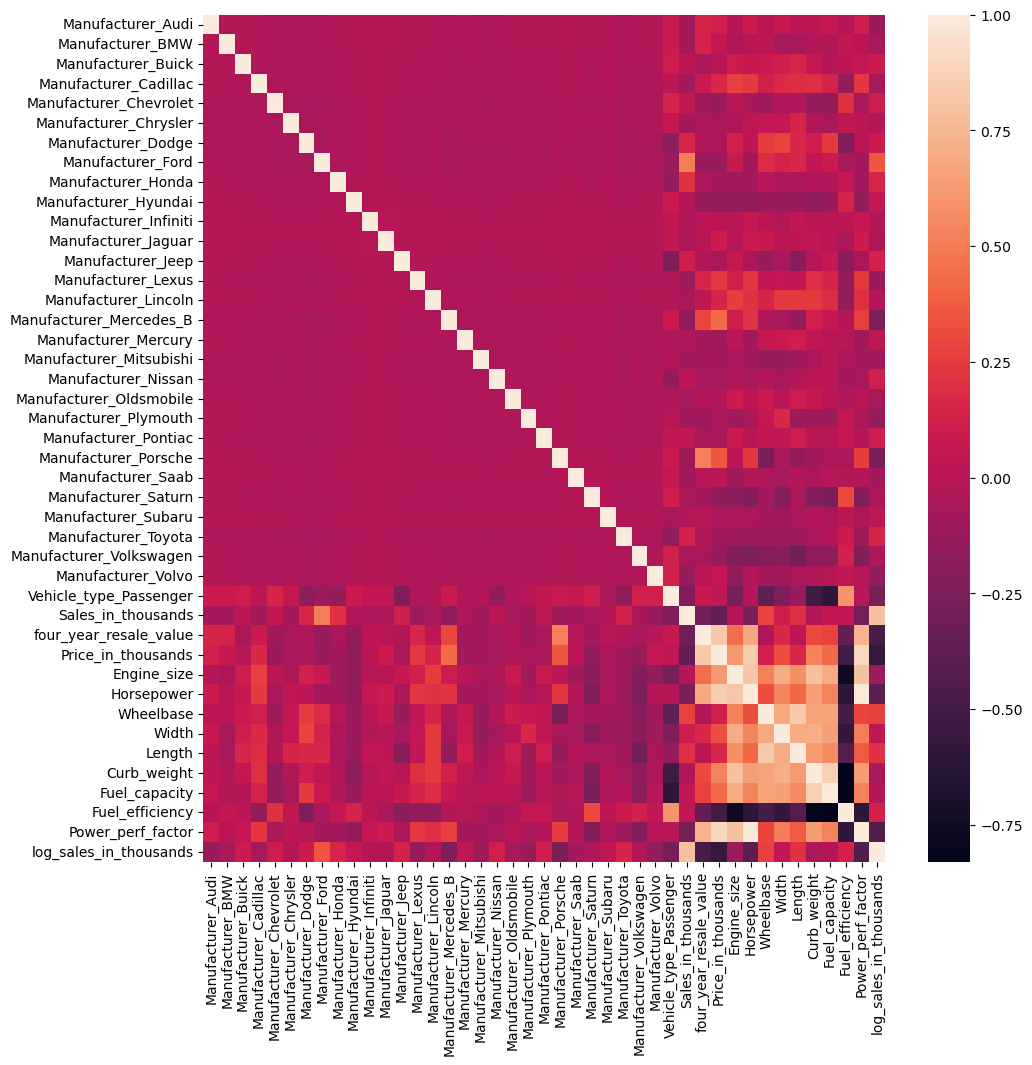

In [706]:
plt.figure( figsize = (11,11))
sns.heatmap( cars_new.corr() )

* it is difficult to read hence we have to export it into excel to understand the summaries better.

In [708]:
summ2 = cars_new.corr()
summ2

Manufacturer_Audi  Manufacturer_BMW  \
Manufacturer_Audi                 1.000000         -0.019481   
Manufacturer_BMW                 -0.019481          1.000000   
Manufacturer_Buick               -0.022568         -0.022568   
Manufacturer_Cadillac            -0.025314         -0.025314   
Manufacturer_Chevrolet           -0.034418         -0.034418   
Manufacturer_Chrysler            -0.030151         -0.030151   
Manufacturer_Dodge               -0.038311         -0.038311   
Manufacturer_Ford                -0.038311         -0.038311   
Manufacturer_Honda               -0.025314         -0.025314   
Manufacturer_Hyundai             -0.019481         -0.019481   
Manufacturer_Infiniti            -0.011175         -0.011175   
Manufacturer_Jaguar              -0.011175         -0.011175   
Manufacturer_Jeep                -0.019481         -0.019481   
Manufacturer_Lexus               -0.027822         -0.027822   
Manufacturer_Lincoln             -0.019481         -0.019481   
Manufacturer_Mercedes_B          -0.034418         -0.034418   
Manufacturer_Mercury             -0.027822         -0.027822   
Manufacturer_Mitsubishi          -0.030151         -0.030151   
Manufacturer_Nissan              -0.030151         -0.030151   
Manufacturer_Oldsmobile          -0.027822         -0.027822   
Manufacturer_Plymouth            -0.022568         -0.022568   
Manufacturer_Pontiac             -0.027822         -0.027822   
Manufacturer_Porsche             -0.019481         -0.019481   
Manufacturer_Saab                -0.015854         -0.015854   
Manufacturer_Saturn              -0.025314         -0.025314   
Manufacturer_Subaru              -0.015854         -0.015854   
Manufacturer_Toyota              -0.034418         -0.034418   
Manufacturer_Volkswagen          -0.027822         -0.027822   
Manufacturer_Volvo               -0.027822         -0.027822   
Vehicle_type_Passenger            0.082978          0.082978   
Sales_in_thousands               -0.091205         -0.086395   
four_year_resale_value            0.146349          0.136878   
Price_in_thousands                0.126770          0.057796   
Engine_size                      -0.016693         -0.050061   
Horsepower                        0.092228          0.000029   
Wheelbase                         0.012553          0.023274   
Width                             0.066172         -0.078841   
Length                            0.022130         -0.078509   
Curb_weight                       0.024442         -0.021871   
Fuel_capacity                     0.058296         -0.026284   
Fuel_efficiency                  -0.015322          0.043666   
Power_perf_factor                 0.101359          0.012841   
log_sales_in_thousands           -0.134931         -0.068309   

                         Manufacturer_Buick  Manufacturer_Cadillac  \
Manufacturer_Audi                 -0.022568              -0.025314   
Manufacturer_BMW                  -0.022568              -0.025314   
Manufacturer_Buick                 1.000000              -0.029326   
Manufacturer_Cadillac             -0.029326               1.000000   
Manufacturer_Chevrolet            -0.039873              -0.044725   
Manufacturer_Chrysler             -0.034929              -0.039180   
Manufacturer_Dodge                -0.044382              -0.049783   
Manufacturer_Ford                 -0.044382              -0.049783   
Manufacturer_Honda                -0.029326              -0.032895   
Manufacturer_Hyundai              -0.022568              -0.025314   
Manufacturer_Infiniti             -0.012946              -0.014521   
Manufacturer_Jaguar               -0.012946              -0.014521   
Manufacturer_Jeep                 -0.022568              -0.025314   
Manufacturer_Lexus                -0.032231              -0.036154   
Manufacturer_Lincoln              -0.022568              -0.025314   
Manufacturer_Mercedes_B           -0.039873              -0.044725   
Manufacturer_Mercu

In [709]:
summ2.to_excel(r'C:\Users\Hp\OneDrive\Documents\Correlations1.xlsx' )

### Variable Reduction

    to need to make the modals accurate we need to choose our most imp x variable 
    Variables can be reduce by 2 ways

    1. Feature Selection:- to select the most imp x vars which needs in the model building

            f regression(x,y)
                every x var is compared with the y var
                it returns 2 things:-
                    a. F-score
                    b. new p_val

                significant x vars are those whose p value are <0.05 or atleast less than 0.1 i.e 90% CI.

    2. Multi-Colinearity:- it is the dependency of x var on themselves

            vif()----> variance inflation factor
                             dmatrices---> array like data structure which stores:
                                    X variables, Vif Score
                                    
                  The vif should not be more than 5.

##### a. Features Selection

    the features can be selected by using the inbuild func

In [712]:
from sklearn.feature_selection import f_regression

In [750]:
features = cars_new.columns.difference(['log_sales_in_thousands' , 'Sales_in_thousands' ])
features

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype

In [752]:
f_score , p_val = f_regression(cars_new[features] , cars_new.log_sales_in_thousands )


In [758]:
x_var = pd.DataFrame()

In [760]:
x_var['Features'] = features
x_var['F_score'] = f_score
x_var['P_value'] = p_val

In [761]:
x_var.head()

Features    F_score       P_value
0      Curb_weight   0.418695  5.185460e-01
1      Engine_size   2.302434  1.312083e-01
2    Fuel_capacity   0.059260  8.079907e-01
3  Fuel_efficiency   2.877548  9.183014e-02
4       Horsepower  29.616745  2.016940e-07

In [762]:
# filtering and subsettinng to find the p values less than 0.1

features = list( x_var.loc[ x_var.P_value < 0.1 , 'Features'] )
features # these are the imp fetires which have the p_values less than 0.1

['Fuel_efficiency',
 'Horsepower',
 'Length',
 'Manufacturer_Audi',
 'Manufacturer_Ford',
 'Manufacturer_Honda',
 'Manufacturer_Mercedes_B',
 'Manufacturer_Plymouth',
 'Manufacturer_Porsche',
 'Manufacturer_Toyota',
 'Manufacturer_Volvo',
 'Power_perf_factor',
 'Price_in_thousands',
 'Vehicle_type_Passenger',
 'Wheelbase',
 'four_year_resale_value']

#### 2. Multi-Colinearity Check

    it is to find the dependency of the x var among them

     vif()----> variance inflation factor
                                     it will check the co-relations between the x variables only, i.e. no y variable is required.
                                     
                             dmatrices---> array like data structure which stores:
                                    X variables, Vif Score
                                    for each x variable, intercept 'c' will be returned.
                                    by default, intercept = 1.0
                                    
                  The vif should not be more than 5.

In [764]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

from patsy import dmatrices

In [765]:
## dmatrices( formula , data ) model is build upon the training data so data 
## dematrice provide the reltionship b/w the various x var with y var
# build the formula of x by using these 16 cols.

modal_param = 'log_sales_in_thousands ~ ' + ' + '.join(features)
modal_param

'log_sales_in_thousands ~ Fuel_efficiency + Horsepower + Length + Manufacturer_Audi + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Mercedes_B + Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + Manufacturer_Volvo + Power_perf_factor + Price_in_thousands + Vehicle_type_Passenger + Wheelbase + four_year_resale_value'

In [776]:
y,X = dmatrices(formula_like = modal_param , data = cars_new , return_type = 'dataframe' )

In [782]:
X # these values are the correlation with the y var

Intercept  Fuel_efficiency  Horsepower  Length  Manufacturer_Audi  \
0          1.0             28.0       140.0   172.4                0.0   
1          1.0             25.0       225.0   192.9                0.0   
2          1.0             26.0       225.0   192.0                0.0   
3          1.0             22.0       210.0   196.6                0.0   
4          1.0             27.0       150.0   178.0                1.0   
..         ...              ...         ...     ...                ...   
152        1.0             25.0       160.0   176.6                0.0   
153        1.0             25.0       168.0   185.9                0.0   
154        1.0             25.0       168.0   186.2                0.0   
155        1.0             23.0       236.0   185.7                0.0   
156        1.0             24.0       201.0   189.8                0.0   

     Manufacturer_Ford  Manufacturer_Honda  Manufacturer_Mercedes_B  \
0                  0.0                 0.0                      0.0   
1                  0.0                 0.0                      0.0   
2                  0.0                 0.0                      0.0   
3                  0.0                 0.0                      0.0   
4                  0.0                 0.0                      0.0   
..                 ...                 ...                      ...   
152                0.0                 0.0                      0.0   
153                0.0                 0.0                      0.0   
154                0.0                 0.0                      0.0   
155                0.0                 0.0                      0.0   
156                0.0                 0.0                      0.0   

     Manufacturer_Plymouth  Manufacturer_Porsche  Manufacturer_Toyota  \
0                      0.0                   0.0                  0.0   
1                      0.0                   0.0                  0.0   
2                      0.0                   0.0                  0.0   
3                      0.0                   0.0                  0.0   
4                      0.0                   0.0                  0.0   
..                     ...                   ...                  ...   
152                    0.0                   0.0                  0.0   
153                    0.0                   0.0                  0.0   
154                    0.0                   0.0                  0.0   
155                    0.0                   0.0                  0.0   
156                    0.0                   0.0                  0.0   

     Manufacturer_Volvo  Power_perf_factor  Price_in_thousands  \
0                   0.0          58.280150           21.500000   
1                   0.0          91.370778           28.400000   
2                   0.0          76.849583           27.328745   
3                   0.0          91.389779           42.000000   
4                   0.0          62.777639           23.990000   
..                  ...                ...                 ...   
152                 1.0          66.498812           24.400000   
153                 1.0          70.654495           27.500000   
154                 1.0          71.155978           28.800000   
155                 1.0         101.623357           45.500000   
156                 1.0          85.735655           36.000000   

     Vehicle_type_Passenger  Wheelbase  four_year_resale_value  
0                       1.0      101.2               16.360000  
1                       1.0      108.1               19.875000  
2                       1.0      106.9               18.225000  
3                       1.0      114.6               29.725000  
4                       1.0      102.6               22.255000  
..                      ...        ...                     ...  
152                     1.0      100.5               18.020008  
153                     1.0      104.9               18.020008  
154     

In [794]:
vif = pd.DataFrame()

vif['features'] = X.columns

vif['VIF_Score'] = [variance_inflation_factor(X.values , i )  for i in range( X.shape[1] ) ] 


In [786]:
X.shape[1]

17

In [798]:
vif #we need that vars which have the vif score less than 5

features   VIF_Score
0                 Intercept  644.058154
1           Fuel_efficiency    4.393539
2                Horsepower  214.842893
3                    Length    5.666776
4         Manufacturer_Audi    1.073516
5         Manufacturer_Ford    1.091235
6        Manufacturer_Honda    1.092045
7   Manufacturer_Mercedes_B    1.722476
8     Manufacturer_Plymouth    1.181433
9      Manufacturer_Porsche    1.675094
10      Manufacturer_Toyota    1.173508
11       Manufacturer_Volvo    1.078381
12        Power_perf_factor  333.516464
13       Price_in_thousands   27.569712
14   Vehicle_type_Passenger    3.212098
15                Wheelbase    5.816262
16   four_year_resale_value    4.248148

In [802]:
features = list ( vif.loc[1: , 'features' ] )

In [804]:
features

['Fuel_efficiency',
 'Horsepower',
 'Length',
 'Manufacturer_Audi',
 'Manufacturer_Ford',
 'Manufacturer_Honda',
 'Manufacturer_Mercedes_B',
 'Manufacturer_Plymouth',
 'Manufacturer_Porsche',
 'Manufacturer_Toyota',
 'Manufacturer_Volvo',
 'Power_perf_factor',
 'Price_in_thousands',
 'Vehicle_type_Passenger',
 'Wheelbase',
 'four_year_resale_value']

### Model 2 

    with all the significant features

In [809]:
# define the formula

formula_m2 = 'log_sales_in_thousands ~ ' + ' + '.join(features)
formula_m2

'log_sales_in_thousands ~ Fuel_efficiency + Horsepower + Length + Manufacturer_Audi + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Mercedes_B + Manufacturer_Plymouth + Manufacturer_Porsche + Manufacturer_Toyota + Manufacturer_Volvo + Power_perf_factor + Price_in_thousands + Vehicle_type_Passenger + Wheelbase + four_year_resale_value'

In [811]:
## define & fit the model
## .fit() func is used to create the slope line and to choose the best fit in the backend


lm2 = smf.ols(formula = formula_m2 , data = train ).fit()

In [813]:
## Model Summaries

print( lm2.summary() )

                              OLS Regression Results                              
Dep. Variable:     log_sales_in_thousands   R-squared:                       0.562
Model:                                OLS   Adj. R-squared:                  0.485
Method:                     Least Squares   F-statistic:                     7.363
Date:                    Sun, 15 Jun 2025   Prob (F-statistic):           1.04e-10
Time:                            21:09:52   Log-Likelihood:                -133.29
No. Observations:                     109   AIC:                             300.6
Df Residuals:                          92   BIC:                             346.3
Df Model:                              16                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

* the r2 is lesser than the prev summary
* diff b/e r2 and adj is less
* but the p_values are still more than 0.1 hence, now in the modal 3 we have to manually remove the x var
* but we need to keep in mind that we should not remove the imp x var which will efffect our summary

### Model 3 :- by selecting few features only

In [899]:
# define the formula

formula_m3 = 'log_sales_in_thousands ~ Fuel_efficiency + Horsepower +  Manufacturer_Ford + Manufacturer_Plymouth + Price_in_thousands + Vehicle_type_Passenger'
formula_m3

'log_sales_in_thousands ~ Fuel_efficiency + Horsepower +  Manufacturer_Ford + Manufacturer_Plymouth + Price_in_thousands + Vehicle_type_Passenger'

* now the deltion will happen one by one
* the deletion will happen upon the p_val < 0.1

In [902]:
## define & fit the modal

lm3 = smf.ols(formula = formula_m3 , data = train).fit()


In [906]:
## modal summaries

print( lm3.summary() ) ## this is the final model to go ahead with

                              OLS Regression Results                              
Dep. Variable:     log_sales_in_thousands   R-squared:                       0.477
Model:                                OLS   Adj. R-squared:                  0.446
Method:                     Least Squares   F-statistic:                     15.51
Date:                    Sun, 15 Jun 2025   Prob (F-statistic):           1.43e-12
Time:                            21:25:43   Log-Likelihood:                -142.89
No. Observations:                     109   AIC:                             299.8
Df Residuals:                         102   BIC:                             318.6
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

* 1. removal of Manufacturer_Mercedes_B
  2. removal of four_year_resale_value
  3. removal of Manufacturer_Porsche
  4. removal of  Manufacturer_Honda
  5. removal of Length
  6. removal of Manufacturer_Audi
  7. removal of Manufacturer_Volvo
  8. removal of Manufacturer_Toyota
  9. removal of Power_perf_factor
  10. removal of Wheelbase

## 4.predict the values of y of both train & test data

    the val of y is predicted by using .predict() func

    the actual y is the sales in thousands var & the predicted y is taken out from the np.exp func()

    by default .predict uses the train data

In [917]:
train['y_predict'] = np.exp( lm3.predict( train ) )
train[ ['Sales_in_thousands' , 'y_predict'] ].head()

Sales_in_thousands   y_predict
135              33.028   64.258422
77               48.911    6.638987
18               14.785   12.236999
48               35.068  127.066258
4                20.397   21.960402

In [919]:
test['y_predict'] = np.exp( lm3.predict( test ) )
test[ ['Sales_in_thousands' , 'y_predict'] ].head()

Sales_in_thousands  y_predict
117               1.872   3.308288
75               51.238  30.606591
51               63.403  87.420255
31               32.306  31.727388
35               76.034  47.493939

### Model Accuracies

    in linear regression the modal accuracies can be tested throigh MSE,RMSE,MAE,MAPE

In [932]:
train_mse = mean_squared_error( train.Sales_in_thousands , train.y_predict )
test_mse = mean_squared_error( test.Sales_in_thousands , test.y_predict )

train_rmse = np.sqrt( train_mse )
test_rmse =  np.sqrt( test_mse )

train_mae = mean_absolute_error(train.Sales_in_thousands , train.y_predict )
test_mae = mean_absolute_error( test.Sales_in_thousands , test.y_predict )

train_mape = mean_absolute_percentage_error( train.Sales_in_thousands , train.y_predict )
test_mape = mean_absolute_percentage_error( test.Sales_in_thousands , test.y_predict )

print("RMSE of train data = ", train_mse, ' | MSE of test data = ', test_mse )
print("RMSE of train data = ", train_rmse, ' | RMSE of test data = ', test_rmse ) # training < testing
print("MAE of train data = ", train_mae, ' | MAE of test data = ', test_mae ) 
print("MAPE of train data = ", train_mape, ' | MAPE of test data = ', test_mape ) 

RMSE of train data =  2176.5627946346426  | MSE of test data =  2543.638449426557
RMSE of train data =  46.653647173984616  | RMSE of test data =  50.434496621127856
MAE of train data =  27.52168796405596  | MAE of test data =  28.34836454307583
MAPE of train data =  1.099870438976072  | MAPE of test data =  0.6593302350595361


* **still we cannot depend upon these values we need to validate our data using decile analysis**

#### Model Validations

    the models are vaildated using decile anaysis
    the decile analysis we have to create the 10 groups of equal sizes by using pd.qcut
    and then we neeed to group then applyy mean upon the cols of y_actual , y_predict
    and if the y vars are there in the asc order that means our modal is good to go
    and is it's not then we need to chnge our model technique
    model validations are done upon both the train & test data and we need to check the asc order for both train & test.

In [943]:
train['Deciles'] = pd.qcut( train.y_predict , 10, labels = range(1,11))

In [947]:
train.head()

Manufacturer_Audi  Manufacturer_BMW  Manufacturer_Buick  \
135                  0                 0                   0   
77                   0                 0                   0   
18                   0                 0                   0   
48                   0                 0                   0   
4                    1                 0                   0   

     Manufacturer_Cadillac  Manufacturer_Chevrolet  Manufacturer_Chrysler  \
135                      0                       0                      0   
77                       0                       0                      0   
18                       1                       0                      0   
48                       0                       0                      0   
4                        0                       0                      0   

     Manufacturer_Dodge  Manufacturer_Ford  Manufacturer_Honda  \
135                   0                  0                   0   
77                    0                  0                   0   
18                    0                  0                   0   
48                    0                  1                   0   
4                     0                  0                   0   

     Manufacturer_Hyundai  ...  Wheelbase  Width  Length  Curb_weight  \
135                     0  ...       99.4   68.3   175.2      3.12500   
77                      0  ...      117.7   78.2   215.3      4.12100   
18                      0  ...      117.5   77.0   201.2      5.39668   
48                      0  ...      106.5   69.1   184.6      2.76900   
4                       0  ...      102.6   68.2   178.0      2.99800   

     Fuel_capacity  Fuel_efficiency  Power_perf_factor  \
135           15.9             24.0          66.762943   
77            19.0             21.0          93.957917   
18            30.0             15.0         109.509117   
48            15.0             25.0          67.351011   
4             16.4             27.0          62.777639   

     log_sales_in_thousands   y_predict  Deciles  
135                3.497356   64.258422       10  
77                 3.890002    6.638987        1  
18                 2.693613   12.236999        2  
48                 3.557289  127.066258       10  
4                  3.015388   21.960402        4  

[5 rows x 45 columns]

In [949]:
test['Deciles'] = pd.qcut( test.y_predict , 10, labels = range(1,11))

In [951]:
test.head()

Manufacturer_Audi  Manufacturer_BMW  Manufacturer_Buick  \
117                  0                 0                   0   
75                   0                 0                   0   
51                   0                 0                   0   
31                   0                 0                   0   
35                   0                 0                   0   

     Manufacturer_Cadillac  Manufacturer_Chevrolet  Manufacturer_Chrysler  \
117                      0                       0                      0   
75                       0                       0                      0   
51                       0                       0                      0   
31                       0                       0                      1   
35                       0                       0                      0   

     Manufacturer_Dodge  Manufacturer_Ford  Manufacturer_Honda  \
117                   0                  0                   0   
75                    0                  0                   0   
51                    0                  1                   0   
31                    0                  0                   0   
35                    1                  0                   0   

     Manufacturer_Hyundai  ...  Wheelbase  Width  Length  Curb_weight  \
117                     0  ...      113.3   76.3   165.4        2.850   
75                      0  ...      103.0   71.5   180.1        3.900   
51                      0  ...      114.7   78.2   212.0        3.908   
31                      0  ...      108.0   71.0   186.0        2.911   
35                      0  ...      105.0   74.4   174.4        2.567   

     Fuel_capacity  Fuel_efficiency  Power_perf_factor  \
117           12.0             21.0         106.984456   
75            17.2             21.0          91.943802   
51            19.0             21.0          80.499537   
31            16.0             27.0          53.566200   
35            12.5             29.0          52.084899   

     log_sales_in_thousands  y_predict  Deciles  
117                0.627007   3.308288        1  
75                 3.936481  30.606591        6  
51                 4.149511  87.420255       10  
31                 3.475253  31.727388        6  
35                 4.331181  47.493939        9  

[5 rows x 45 columns]

In [957]:
## group by to perform the summaries.

train_decile = train.groupby('Deciles')[['Sales_in_thousands' , 'y_predict' ]].mean()
train_decile

C:\Users\Hp\AppData\Local\Temp\ipykernel_32716\1957550577.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_decile = train.groupby('Deciles')[['Sales_in_thousands' , 'y_predict' ]].mean()


Sales_in_thousands   y_predict
Deciles                                
1                  9.681844    5.478599
2                 10.788571   12.217868
3                 18.214727   18.232025
4                 41.083455   24.767635
5                 37.743455   27.222961
6                 67.202900   30.267134
7                 58.280818   35.327912
8                 57.684273   42.228609
9                 59.245545   51.629472
10               131.401302  113.836310

* **y_actual & y_pred both has to follow the asc order but only y_pred is following.**

In [960]:
test_decile = test.groupby('Deciles')[['Sales_in_thousands' , 'y_predict' ]].mean()
test_decile

C:\Users\Hp\AppData\Local\Temp\ipykernel_32716\2226563561.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_decile = test.groupby('Deciles')[['Sales_in_thousands' , 'y_predict' ]].mean()


Sales_in_thousands   y_predict
Deciles                                
1                  9.696400    2.807174
2                 11.759000    9.149406
3                 22.906400   15.411556
4                 19.563250   22.215138
5                 46.433400   25.975017
6                 44.378400   30.553269
7                140.192250   35.407359
8                 46.720800   43.666851
9                 61.481600   51.156332
10               166.446864  106.270029

* **y_act is not following the asc order**
* hence, we reject our model

#### What can be the possible reasons for poor model performance?

* the sample size is small
* the linear regresion model is not the right approach

##### other assumptions of the linear model


###### the means of the errors must be 0

    .resid() helps us to find it

In [977]:
lm3.resid.mean() # the resids are'nt 0 hence our model isn't good.

1.2999998631097063e-13

##### 2. Residues should not be co-related with dependent Y variable:

In [982]:
## to check the correlation b/w 2 vars we need to use pearon's r


stats.pearsonr( lm3.resid , train.log_sales_in_thousands )

PearsonRResult(statistic=0.7231540341571822, pvalue=6.706913978003887e-19)

* it's 0.72 a very strong correlations hence, the assumption prooves to be wrong

##### 3. Heteroscedacticity:

With increase in X, y also increases, but if its shows clustured, then its not a regression problem, its a clusturing problem

### Tips/guidlines for imporvement of model accuracy

#### Possible reasons for model is not validating (over fitting)
---------------------------------------------------------------------------------------------
1. Data preparation problem (outliers, missings, variable conversions etc. not correct)
2. not included right variables
3. If the data have multicollinerity
4. Including more number of variables 
5. Data size is very low  (ideally we should have 1varaible = 100 obs)
6. The assumptions are not 100% valid
7. The variables are not explaining completely

#### How to over come this problem?
--------------------------------------------------------------------------------------------
1. Increase the data/sample size
2. Change the variables - Reiterate the model with different combinations of variables
3. Apply right transformations on X variables such the the linear relationship between Y & X will imrpvove
4. Add dervied variables which can explain Y better
5. Re look into data preparation steps
6. Look at the importance of variables include them in the model
7. Change the modelling technique

******************
There are few techniques can help you to identify important variables (Variable selection - Feature selection)
* F-Regression
* RFE (Recursive feature elimination) - Stepwise regression
******************

### 10.Data Modelling

    1. Train/Test Split : the raw data is divided into train(70%) & test(30%)
    2. Define & Fit the Model: one line code for defining and fitting it involves the formula of the linear eq
        y ~ x1 + x2 + x3.....
    3. Model Summary: .summary()
    4. predict the value of y for both train & test
    5. analyse the actual & predicted y var ( MAE, MAPE, MSE, RMSE )

##### 1. Train/Test Split

    the train split can be done by stats model & also by ml models.

    i. statsmodel.formula.aqi as smf
       train_test =  train_test_split( data , train = , test = , random_state = )
           random state is used to fix the random records.

    ii. from sklearn i.e ml model: it will return 4 output
        x_train , x_test , y_train , y_test = train_test_split( x, y)
            where x is the all the x vars(features) & y is the sales in thousands(log normally dstributed sales) 

In [479]:
# from statsmodel

train , test = train_test_split( cars_new , train_size = 0.7 , test_size = 0.3 , random_state = 1)

In [485]:
train.head()

Manufacturer_Audi  Manufacturer_BMW  Manufacturer_Buick  \
135                  0                 0                   0   
77                   0                 0                   0   
18                   0                 0                   0   
48                   0                 0                   0   
4                    1                 0                   0   

     Manufacturer_Cadillac  Manufacturer_Chevrolet  Manufacturer_Chrysler  \
135                      0                       0                      0   
77                       0                       0                      0   
18                       1                       0                      0   
48                       0                       0                      0   
4                        0                       0                      0   

     Manufacturer_Dodge  Manufacturer_Ford  Manufacturer_Honda  \
135                   0                  0                   0   
77                    0                  0                   0   
18                    0                  0                   0   
48                    0                  1                   0   
4                     0                  0                   0   

     Manufacturer_Hyundai  ...  Engine_size  Horsepower  Wheelbase  Width  \
135                     0  ...          2.5       165.0       99.4   68.3   
77                      0  ...          4.6       215.0      117.7   78.2   
18                      0  ...          5.7       255.0      117.5   77.0   
48                      0  ...          2.5       170.0      106.5   69.1   
4                       0  ...          1.8       150.0      102.6   68.2   

     Length  Curb_weight  Fuel_capacity  Fuel_efficiency  Power_perf_factor  \
135   175.2      3.12500           15.9             24.0          66.762943   
77    215.3      4.12100           19.0             21.0          93.957917   
18    201.2      5.39668           30.0             15.0         109.509117   
48    184.6      2.76900           15.0             25.0          67.351011   
4     178.0      2.99800           16.4             27.0          62.777639   

     log_sales_in_thousands  
135                3.497356  
77                 3.890002  
18                 2.693613  
48                 3.557289  
4                  3.015388  

[5 rows x 43 columns]

In [487]:
test.head()

Manufacturer_Audi  Manufacturer_BMW  Manufacturer_Buick  \
117                  0                 0                   0   
75                   0                 0                   0   
51                   0                 0                   0   
31                   0                 0                   0   
35                   0                 0                   0   

     Manufacturer_Cadillac  Manufacturer_Chevrolet  Manufacturer_Chrysler  \
117                      0                       0                      0   
75                       0                       0                      0   
51                       0                       0                      0   
31                       0                       0                      1   
35                       0                       0                      0   

     Manufacturer_Dodge  Manufacturer_Ford  Manufacturer_Honda  \
117                   0                  0                   0   
75                    0                  0                   0   
51                    0                  1                   0   
31                    0                  0                   0   
35                    1                  0                   0   

     Manufacturer_Hyundai  ...  Engine_size  Horsepower  Wheelbase  Width  \
117                     0  ...          3.5       253.0      113.3   76.3   
75                      0  ...          3.0       220.0      103.0   71.5   
51                      0  ...          4.6       200.0      114.7   78.2   
31                      0  ...          2.0       132.0      108.0   71.0   
35                      0  ...          2.0       132.0      105.0   74.4   

     Length  Curb_weight  Fuel_capacity  Fuel_efficiency  Power_perf_factor  \
117   165.4        2.850           12.0             21.0         106.984456   
75    180.1        3.900           17.2             21.0          91.943802   
51    212.0        3.908           19.0             21.0          80.499537   
31    186.0        2.911           16.0             27.0          53.566200   
35    174.4        2.567           12.5             29.0          52.084899   

     log_sales_in_thousands  
117                0.627007  
75                 3.936481  
51                 4.149511  
31                 3.475253  
35                 4.331181  

[5 rows x 43 columns]

In [499]:
# from sklearn both x & y var neeads to be there y is confirmed
# y = cars_new.log_sales_in_thousands

features = cars_new.columns.difference(['Sales_in_thousands' , 'log_sales_in_thousands'])
features

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype

In [503]:
x_train , x_test , y_train , y_test = train_test_split( cars_new[features] , cars_new.log_sales_in_thousands , train_size = 0.7 , test_size = 0.3,
                                                      random_state = 1)

In [509]:
x_train.head() # output will be same

Curb_weight  Engine_size  Fuel_capacity  Fuel_efficiency  Horsepower  \
135      3.12500          2.5           15.9             24.0       165.0   
77       4.12100          4.6           19.0             21.0       215.0   
18       5.39668          5.7           30.0             15.0       255.0   
48       2.76900          2.5           15.0             25.0       170.0   
4        2.99800          1.8           16.4             27.0       150.0   

     Length  Manufacturer_Audi  Manufacturer_BMW  Manufacturer_Buick  \
135   175.2                  0                 0                   0   
77    215.3                  0                 0                   0   
18    201.2                  0                 0                   0   
48    184.6                  0                 0                   0   
4     178.0                  1                 0                   0   

     Manufacturer_Cadillac  ...  Manufacturer_Subaru  Manufacturer_Toyota  \
135                      0  ...                    1                    0   
77                       0  ...                    0                    0   
18                       1  ...                    0                    0   
48                       0  ...                    0                    0   
4                        0  ...                    0                    0   

     Manufacturer_Volkswagen  Manufacturer_Volvo  Power_perf_factor  \
135                        0                   0          66.762943   
77                         0                   0          93.957917   
18                         0                   0         109.509117   
48                         0                   0          67.351011   
4                          0                   0          62.777639   

     Price_in_thousands  Vehicle_type_Passenger  Wheelbase  Width  \
135              20.095                       0       99.4   68.3   
77               43.330                       1      117.7   78.2   
18               46.225                       0      117.5   77.0   
48               17.035                       1      106.5   69.1   
4                23.990                       1      102.6   68.2   

     four_year_resale_value  
135               18.020008  
77                21.725000  
18                18.020008  
48                 8.835000  
4                 22.255000  

[5 rows x 41 columns]

* **the model is created on train data**
* **the model is validated/predicted on both train & test data**

##### Building the Model

    define the model:-
        model is defined on training data using the stats model.

    smf.ols(formula = , data = train)

        formula = y ~ x1 + x2 + x3

In [519]:
features # x vars

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes_B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Power_perf_factor', 'Price_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype

In [521]:
' + '.join( features ) # x1+x2+x3....

'Curb_weight + Engine_size + Fuel_capacity + Fuel_efficiency + Horsepower + Length + Manufacturer_Audi + Manufacturer_BMW + Manufacturer_Buick + Manufacturer_Cadillac + Manufacturer_Chevrolet + Manufacturer_Chrysler + Manufacturer_Dodge + Manufacturer_Ford + Manufacturer_Honda + Manufacturer_Hyundai + Manufacturer_Infiniti + Manufacturer_Jaguar + Manufacturer_Jeep + Manufacturer_Lexus + Manufacturer_Lincoln + Manufacturer_Mercedes_B + Manufacturer_Mercury + Manufacturer_Mitsubishi + Manufacturer_Nissan + Manufacturer_Oldsmobile + Manufacturer_Plymouth + Manufacturer_Pontiac + Manufacturer_Porsche + Manufacturer_Saab + Manufacturer_Saturn + Manufacturer_Subaru + Manufacturer_Toyota + Manufacturer_Volkswagen + Manufacturer_Volvo + Power_perf_factor + Price_in_thousands + Vehicle_type_Passenger + Wheelbase + Width + four_year_resale_value'

### Model0 :- Without removing any variables

In [527]:
## formula = y ~ x1+x2+x3+x4....


m0 = 'log_sales_in_thousands ~ ' + '+'.join(features)
m0

'log_sales_in_thousands ~ Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_Mercedes_B+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+Width+four_year_resale_value'

In [531]:
# Defining the Model

lm0 = smf.ols(formula = m0 , data = train)

In [533]:
# fitting the model

lm0 = lm0.fit()

#### Model Summary

In [540]:
print( lm0.summary() )

                              OLS Regression Results                              
Dep. Variable:     log_sales_in_thousands   R-squared:                       0.700
Model:                                OLS   Adj. R-squared:                  0.523
Method:                     Least Squares   F-statistic:                     3.962
Date:                    Sat, 14 Jun 2025   Prob (F-statistic):           3.00e-07
Time:                            20:40:40   Log-Likelihood:                -112.66
No. Observations:                     109   AIC:                             307.3
Df Residuals:                          68   BIC:                             417.7
Df Model:                              40                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

* **the model is inaccurate coz**
* the r2 value surpases the decent range i.e 0.4-0.6
* the diff b/w r2 & adj r2 is 0.007 and the max diff must be across 20%
* the p values must be less than 0.1 but it is crossing beyond that
* **thus, to overcome these probs we need to reduce our variables in before model building**